<a href="https://colab.research.google.com/github/Patricia-Serpa/Curriculo/blob/main/Analise_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar biblioteca
import pandas as pd


In [2]:
# Leitura dos arquivos
df1 = pd.read_excel('/content/Aracaju.xlsx')
df2 = pd.read_excel('/content/Fortaleza.xlsx')
df3 = pd.read_excel('/content/Natal.xlsx')
df4 = pd.read_excel('/content/Recife.xlsx')
df5 = pd.read_excel('/content/Salvador.xlsx')

In [3]:
df5.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Salvador,2018-01-01,31.06,1037,3
1,Salvador,2018-01-01,19.02,1034,3
2,Salvador,2019-02-10,173.59,1035,3
3,Salvador,2019-02-10,176.34,1037,3
4,Salvador,2019-02-14,19.47,1037,3


In [4]:
# Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
# Visualizar as 5 primeiras linhas
df.head()

In [ ]:
# Visualizar as 5 ultimas linhas
df.tail()

In [ ]:
# Amostra do arquivo 5 linhas aleatórias
df.sample(5)

In [8]:
# Verificar tipo de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

**Valores Faltantes**

In [9]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [10]:
# Substituindo os valores nulos pela media
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

In [12]:
df['Vendas'].mean()

122.61180089485438

In [13]:
# Substituir os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [14]:
# Apagando linhas com valores nulos


**Criando colunas novas**

In [15]:
# Criando a coluna receitas
df['Receitas'] = df['Vendas'].mul(df['Qtde'])

In [16]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
# Retornando a maior receita
df['Receitas'].max()

3544.0

In [20]:
# Retorna as maiores Receitas
df.nlargest(3, 'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [21]:
# Retorna as menores Receitas
df.nsmallest(3, 'Receitas')

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
# Agrupamento de Receitas por cidade
df.groupby('Cidade')['Receitas'].sum()

In [27]:
df.sort_values('Receitas', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [28]:
# Transformando coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])


In [29]:
df.dtypes

Cidade              object
Data        datetime64[ns]
Vendas             float64
LojaID               int64
Qtde                 int64
Receitas           float64
dtype: object

In [32]:
# Visualizando a Receita por ano
df.groupby(df['Data'].dt.year)['Receitas'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receitas, dtype: float64

In [33]:
# Criando uma nova coluna Ano_venda
df['Ano_Venda'] = df['Data'].dt.year

In [35]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda
44,Aracaju,2018-01-01,11.42,1520,5,57.10,2018
72,Salvador,2019-01-01,149.47,1036,3,448.41,2019
171,Natal,2019-01-02,136.45,1035,3,409.35,2019
2,Recife,2019-02-10,12.94,983,5,64.70,2019
122,Fortaleza,2019-03-02,235.06,983,3,705.18,2019


In [37]:
# Extrair o Mês e o dia da venda
df['Mes_venda'], df['Dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [ ]:
df.sample(10)

In [41]:
# retornando a data mais antiga conjunto de Dados
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [42]:
# Calcular diferença de dias
df['Diferenca_dias'] = df['Data'] - df['Data'].min()

In [43]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receitas,Ano_Venda,Mes_venda,Dia_venda,Diferenca_dias
118,Fortaleza,2019-03-02,17.70,981,5,88.50,2019,3,2,425 days
42,Natal,2019-03-02,775.00,854,2,1550.00,2019,3,2,425 days
232,Natal,2019-01-03,167.76,1034,3,503.28,2019,1,3,367 days
205,Natal,2019-01-02,196.09,1037,1,196.09,2019,1,2,366 days
194,Natal,2019-01-02,156.47,1035,1,156.47,2019,1,2,366 days


In [44]:
# Criar coluna com Trimestre
C

In [ ]:
df.sample(5)

In [58]:
# Filtrar as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [ ]:
df.sample(5)

**Visualização de dados**

In [62]:
#  Quantidade de vendas por loja 
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

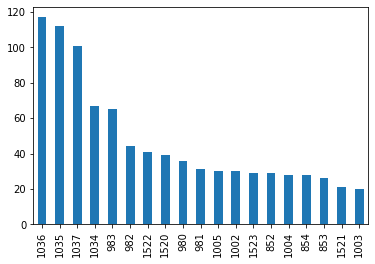

In [66]:
# Grafico Quantidade de vendas por loja 
df['LojaID'].value_counts(ascending=False).plot.bar();

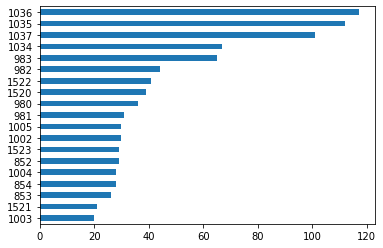

In [67]:
df['LojaID'].value_counts(ascending=True).plot.barh();

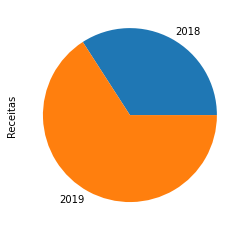

In [70]:
# Grafico Pizza Visualizando a Receita por ano
df.groupby(df['Data'].dt.year)['Receitas'].sum().plot.pie();

In [71]:
# Total de vendas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

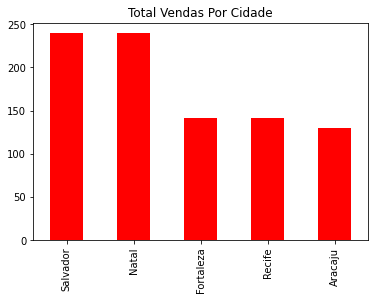

In [75]:
# Adicionando titulo e nome de eixos
import matplotlib.pyplot as plt
df['Cidade'].value_counts().plot.bar(title='Total Vendas Por Cidade', color='red')
plt.xlabel=('Cidade')
plt.ylabel=('Total de Vendas');

In [77]:
# Alterando o estilo do gráfico
plt.style.use('ggplot')

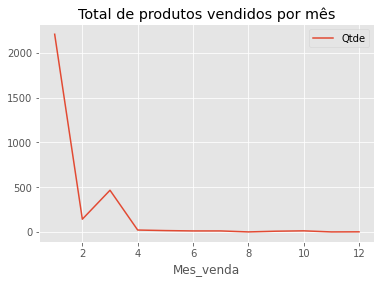

In [82]:
df.groupby(df['Mes_venda'])['Qtde'].sum().plot(title='Total de produtos vendidos por mês')
plt.xlabel=('Mes')
plt.ylabel=('Total produtos Vendidos')
plt.legend();

In [83]:
df.groupby(df['Mes_venda'])['Qtde'].sum()

Mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [84]:
df_2019 = df[df['Ano_Venda'] == 2019]

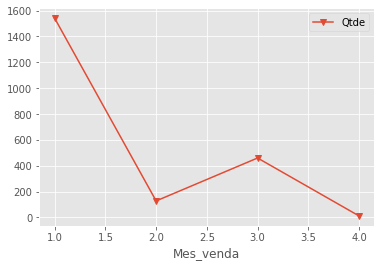

In [86]:
df_2019.groupby(df_2019['Mes_venda'])['Qtde'].sum().plot(marker='v')
plt.xlabel=('Mes')
plt.ylabel=('Total produtos Vendidos')
plt.legend();

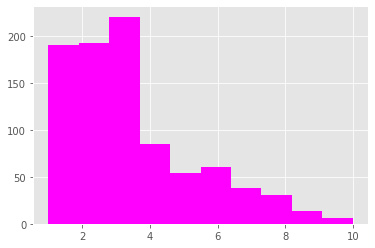

In [89]:
plt.hist(df['Qtde'], color='magenta');

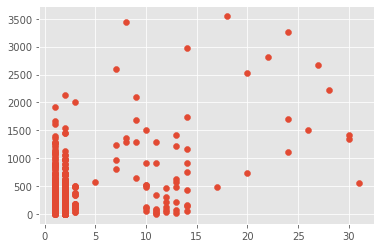

In [91]:
plt.scatter(x=df_2019['Dia_venda'], y=df_2019['Receitas']);

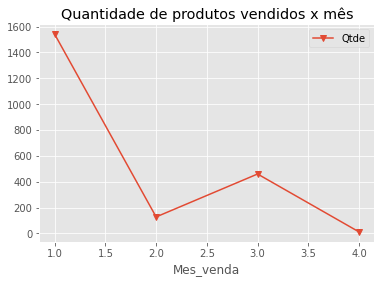

In [92]:
df_2019.groupby(['Mes_venda'])['Qtde'].sum().plot(marker='v')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel=('Mes')
plt.ylabel=('Total produtos Vendidos')
plt.legend();
plt.savefig('Quantidade de produtos vendidos x mês.png')